In [54]:
import json
import os

cwd = os.getcwd()

notebook_name = None
for root, dirs, files in os.walk(cwd):
    for file in files:
        if file.endswith('.ipynb'):
            notebook_name = file
            break
    if notebook_name:
        break

if notebook_name:
    full_path = os.path.join(cwd, notebook_name)
    print(f"Full Path of the Notebook: {full_path}")
else:
    print("Notebook file not found")


Full Path of the Notebook: /Users/oguzhan/Portfolio Projects/Predicting Online Course Engagement/Predicting Online Course Engagement.ipynb


In [2]:
!pip install cufflinks

## Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler,MinMaxScaler,RobustScaler,PowerTransformer,FunctionTransformer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.linear_model import LogisticRegression,RidgeClassifier,LassoCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
import scipy.stats as stats

import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)

#enable offline mode for Plotly to render the plots properly
py.init_notebook_mode(connected=True)
cf.go_offline()
sns.set(style="darkgrid")

## Loading The Dataset

In [4]:
#pd.read_csv reads the dataset in the same folder by using Pandas
ds = pd.read_csv('online_course_engagement_data.csv')

In [5]:
#shows the first 5 rows in the dataset
ds.head()

UserID CourseCategory  TimeSpentOnCourse  NumberOfVideosWatched  \
0    5618         Health          29.979719                     17   
1    4326           Arts          27.802640                      1   
2    5849           Arts          86.820485                     14   
3    4992        Science          35.038427                     17   
4    3866    Programming          92.490647                     16   

   NumberOfQuizzesTaken  QuizScores  CompletionRate  DeviceType  \
0                     3   50.365656       20.860773           1   
1                     5   62.615970       65.632415           1   
2                     2   78.458962       63.812007           1   
3                    10   59.198853       95.433162           0   
4                     0   98.428285       18.102478           0   

   CourseCompletion  
0                 0  
1                 0  
2                 1  
3                 1  
4                 0

In [6]:
#shows the first 10 rows in the dataset
ds.head(10)

UserID CourseCategory  TimeSpentOnCourse  NumberOfVideosWatched  \
0    5618         Health          29.979719                     17   
1    4326           Arts          27.802640                      1   
2    5849           Arts          86.820485                     14   
3    4992        Science          35.038427                     17   
4    3866    Programming          92.490647                     16   
5    8650         Health          79.466129                     12   
6    4321         Health          78.908724                     10   
7    4589       Business          12.068237                     16   
8    4215       Business          81.935709                      8   
9    8089    Programming          83.394026                     15   

   NumberOfQuizzesTaken  QuizScores  CompletionRate  DeviceType  \
0                     3   50.365656       20.860773           1   
1                     5   62.615970       65.632415           1   
2                     2   78.458962       63.812007           1   
3                    10   59.198853       95.433162           0   
4                     0   98.428285       18.102478           0   
5                     7   70.233329       76.484023           0   
6                     2   86.836533       22.588896           1   
7                     3   61.553646       27.410991           1   
8                     4   90.264564       33.308437           0   
9                    10   63.956353       33.261300           1   

   CourseCompletion  
0                 0  
1                 0  
2                 1  
3                 1  
4                 0  
5                 1  
6                 0  
7                 0  
8                 1  
9                 0

## Taking Information About The Dataset

In [7]:
print(f" Number of Rows:{ds.shape[0]}, Number of Columns:{ds.shape[1]} ")

 Number of Rows:9000, Number of Columns:9 


In [8]:
ds.columns

Index(['UserID', 'CourseCategory', 'TimeSpentOnCourse',
       'NumberOfVideosWatched', 'NumberOfQuizzesTaken', 'QuizScores',
       'CompletionRate', 'DeviceType', 'CourseCompletion'],
      dtype='object')

In [9]:
#dropping the UserID column from the dataset as I dont need the UserID column
ds.drop(columns=['UserID'])

CourseCategory  TimeSpentOnCourse  NumberOfVideosWatched  \
0            Health          29.979719                     17   
1              Arts          27.802640                      1   
2              Arts          86.820485                     14   
3           Science          35.038427                     17   
4       Programming          92.490647                     16   
...             ...                ...                    ...   
8995         Health          37.445225                     14   
8996        Science          48.631443                      7   
8997         Health          38.212512                      3   
8998         Health          70.048665                     13   
8999         Health          93.589781                      7   

      NumberOfQuizzesTaken  QuizScores  CompletionRate  DeviceType  \
0                        3   50.365656       20.860773           1   
1                        5   62.615970       65.632415           1   
2                        2   78.458962       63.812007           1   
3                       10   59.198853       95.433162           0   
4                        0   98.428285       18.102478           0   
...                    ...         ...             ...         ...   
8995                     4   54.469359       32.990704           1   
8996                     7   59.413257        0.254625           0   
8997                     3   69.508297       70.188159           1   
8998                    10   79.655182       72.975225           1   
8999                     5   56.274546       11.299071           0   

      CourseCompletion  
0                    0  
1                    0  
2                    1  
3                    1  
4                    0  
...                ...  
8995                 0  
8996                 0  
8997                 0  
8998                 1  
8999                 0  

[9000 rows x 8 columns]

# DATA PREPROCESSING

## Determining The Missing Values

##### def check_misval(ds) function calculates and returns the number and percentage of missing values in each column of the dataset.

In [10]:
def check_misval(ds):
    #calculating and sorting the number of missing values in each column
    miss_v = ds.isnull().sum().sort_values(ascending=False)
    miss_per = (ds.isnull().sum()/ds.isnull().count()).sort_values(ascending=False)
    miss_v = pd.concat([miss_v, miss_per], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return miss_v

check_misval(ds)

Missing_Number  Missing_Percent
UserID                              0              0.0
CourseCategory                      0              0.0
TimeSpentOnCourse                   0              0.0
NumberOfVideosWatched               0              0.0
NumberOfQuizzesTaken                0              0.0
QuizScores                          0              0.0
CompletionRate                      0              0.0
DeviceType                          0              0.0
CourseCompletion                    0              0.0

##### we dont have any missing number in the columns, so we dont need to remove any data from the dataset.

## Determining and Dropping Duplicated Rows

In [11]:
print(f"Number of Duplicated Rows: {ds.duplicated().sum()}") #ds.duplicated() finds the duplicated rows in the data

Number of Duplicated Rows: 877


In [12]:
#dropping the duplicated rows but keeping the first row 
ds = ds.drop_duplicates(keep='first') 

In [13]:
#checking for the new version of the dataset after dropping the duplicated rows
print(f"Number of Duplicated Rows after Drop: {ds.duplicated().sum()}")

Number of Duplicated Rows after Drop: 0


## Encoding the Colums

In [14]:
encoding_types = ["Label Encoding: ['Low', 'Medium', 'High'] can be encoded as [0, 1, 2]", 
                  "One-Hot Encoding: ['Red', 'Green', 'Blue'] can be encoded as three columns: [1, 0, 0], [0, 1, 0], [0, 0, 1]", 
                  "Ordinal Encoding: ['First', 'Second', 'Third'] can be encoded as [1, 2, 3]",
                  "Binary Encoding: Categories [0, 1, 2, 3, 4] can be encoded as binary [000, 001, 010, 011, 100] and then split into columns.",
                  "Frequency Encoding: ['A', 'A', 'B', 'C', 'C', 'C'] can be encoded as [2, 2, 1, 3, 3, 3].",
                  "Target Encoding"]
print("Encoding Types")
for encoding in encoding_types:
    print(f" \u2022 {encoding}")

Encoding Types
 • Label Encoding: ['Low', 'Medium', 'High'] can be encoded as [0, 1, 2]
 • One-Hot Encoding: ['Red', 'Green', 'Blue'] can be encoded as three columns: [1, 0, 0], [0, 1, 0], [0, 0, 1]
 • Ordinal Encoding: ['First', 'Second', 'Third'] can be encoded as [1, 2, 3]
 • Binary Encoding: Categories [0, 1, 2, 3, 4] can be encoded as binary [000, 001, 010, 011, 100] and then split into columns.
 • Frequency Encoding: ['A', 'A', 'B', 'C', 'C', 'C'] can be encoded as [2, 2, 1, 3, 3, 3].
 • Target Encoding


In [15]:
#since the order of the categories are inherent "Ordinal Encoding" is used
ds.head(10)

UserID CourseCategory  TimeSpentOnCourse  NumberOfVideosWatched  \
0    5618         Health          29.979719                     17   
1    4326           Arts          27.802640                      1   
2    5849           Arts          86.820485                     14   
3    4992        Science          35.038427                     17   
4    3866    Programming          92.490647                     16   
5    8650         Health          79.466129                     12   
6    4321         Health          78.908724                     10   
7    4589       Business          12.068237                     16   
8    4215       Business          81.935709                      8   
9    8089    Programming          83.394026                     15   

   NumberOfQuizzesTaken  QuizScores  CompletionRate  DeviceType  \
0                     3   50.365656       20.860773           1   
1                     5   62.615970       65.632415           1   
2                     2   78.458962       63.812007           1   
3                    10   59.198853       95.433162           0   
4                     0   98.428285       18.102478           0   
5                     7   70.233329       76.484023           0   
6                     2   86.836533       22.588896           1   
7                     3   61.553646       27.410991           1   
8                     4   90.264564       33.308437           0   
9                    10   63.956353       33.261300           1   

   CourseCompletion  
0                 0  
1                 0  
2                 1  
3                 1  
4                 0  
5                 1  
6                 0  
7                 0  
8                 1  
9                 0

In [16]:
dist_cat = ["CourseCategory" , "DeviceType" , "CourseCompletion"] #"dist_cat ->> distinct categories"
#checking the unique classes in the selected column
for column in ds[dist_cat]:
    print(f"{column}: {ds[column].unique()}")

CourseCategory: ['Health' 'Arts' 'Science' 'Programming' 'Business']
DeviceType: [1 0]
CourseCompletion: [0 1]


In [17]:
#encoding mapping
mappings = {'Health':1,'Arts':2,'Science':3,'Programming':4,'Business':5}

In [18]:
#appliyng priority based encoding mapping
ds['CourseCategory'] = ds['CourseCategory'].replace(mappings)
#ds.head(10) takes the first 10 rows; ds.sample(10) randomly selects 10 rows
ds.sample(10)

UserID  CourseCategory  TimeSpentOnCourse  NumberOfVideosWatched  \
2464    1939               3          53.249449                      4   
2682    7448               1          89.032187                      9   
2636    4123               2           2.108731                     14   
126     8890               1          13.022819                     11   
6591    2900               3          63.923755                     12   
8557    8100               2          36.852730                     15   
5868    4702               2          82.735259                     15   
308     1468               5          82.888657                      6   
3698    5870               4          95.403650                     17   
5858     621               1          65.574137                      4   

      NumberOfQuizzesTaken  QuizScores  CompletionRate  DeviceType  \
2464                     2   78.787151       62.819330           0   
2682                     9   70.923404       32.400757           0   
2636                     0   95.191304       38.612604           0   
126                      6   75.827722        3.193659           0   
6591                     5   92.682972       65.176356           0   
8557                     8   54.158518       83.905645           1   
5868                     5   58.754695       87.047352           0   
308                      7   98.734951       48.061548           1   
3698                     0   88.360416       45.589216           1   
5858                     7   94.024031       58.175289           0   

      CourseCompletion  
2464                 0  
2682                 1  
2636                 0  
126                  0  
6591                 1  
8557                 1  
5868                 1  
308                  1  
3698                 0  
5858                 0

## Statistical Information of The Dataset

In [19]:
ds.describe() #The ds.describe() method in Pandas provides a summary of the statistics pertaining to the DataFrame ds. 

UserID  CourseCategory  TimeSpentOnCourse  NumberOfVideosWatched  \
count  8123.000000     8123.000000        8123.000000            8123.000000   
mean   4504.687185        3.013419          50.607728              10.148098   
std    2604.220672        1.419494          28.364184               5.987972   
min       1.000000        1.000000           1.005230               0.000000   
25%    2248.500000        2.000000          26.114631               5.000000   
50%    4492.000000        3.000000          50.316921              10.000000   
75%    6766.500000        4.000000          75.377730              15.000000   
max    9000.000000        5.000000          99.992558              20.000000   

       NumberOfQuizzesTaken   QuizScores  CompletionRate   DeviceType  \
count           8123.000000  8123.000000     8123.000000  8123.000000   
mean               5.166933    75.091084       51.190873     0.500431   
std                3.132108    14.339876       29.069716     0.500031   
min                0.000000    50.005119        0.009327     0.000000   
25%                2.000000    62.791226       26.276765     0.000000   
50%                5.000000    75.273913       51.581186     1.000000   
75%                8.000000    87.497542       76.729629     1.000000   
max               10.000000    99.994984       99.979711     1.000000   

       CourseCompletion  
count       8123.000000  
mean           0.439247  
std            0.496326  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            1.000000  
max            1.000000

In [20]:
#looking for the correlations of the features with the course completion
ds.corr()['CourseCompletion']

UserID                   0.021000
CourseCategory           0.012604
TimeSpentOnCourse        0.186399
NumberOfVideosWatched    0.239476
NumberOfQuizzesTaken     0.291650
QuizScores               0.304706
CompletionRate           0.328800
DeviceType               0.008663
CourseCompletion         1.000000
Name: CourseCompletion, dtype: float64

<Axes: >

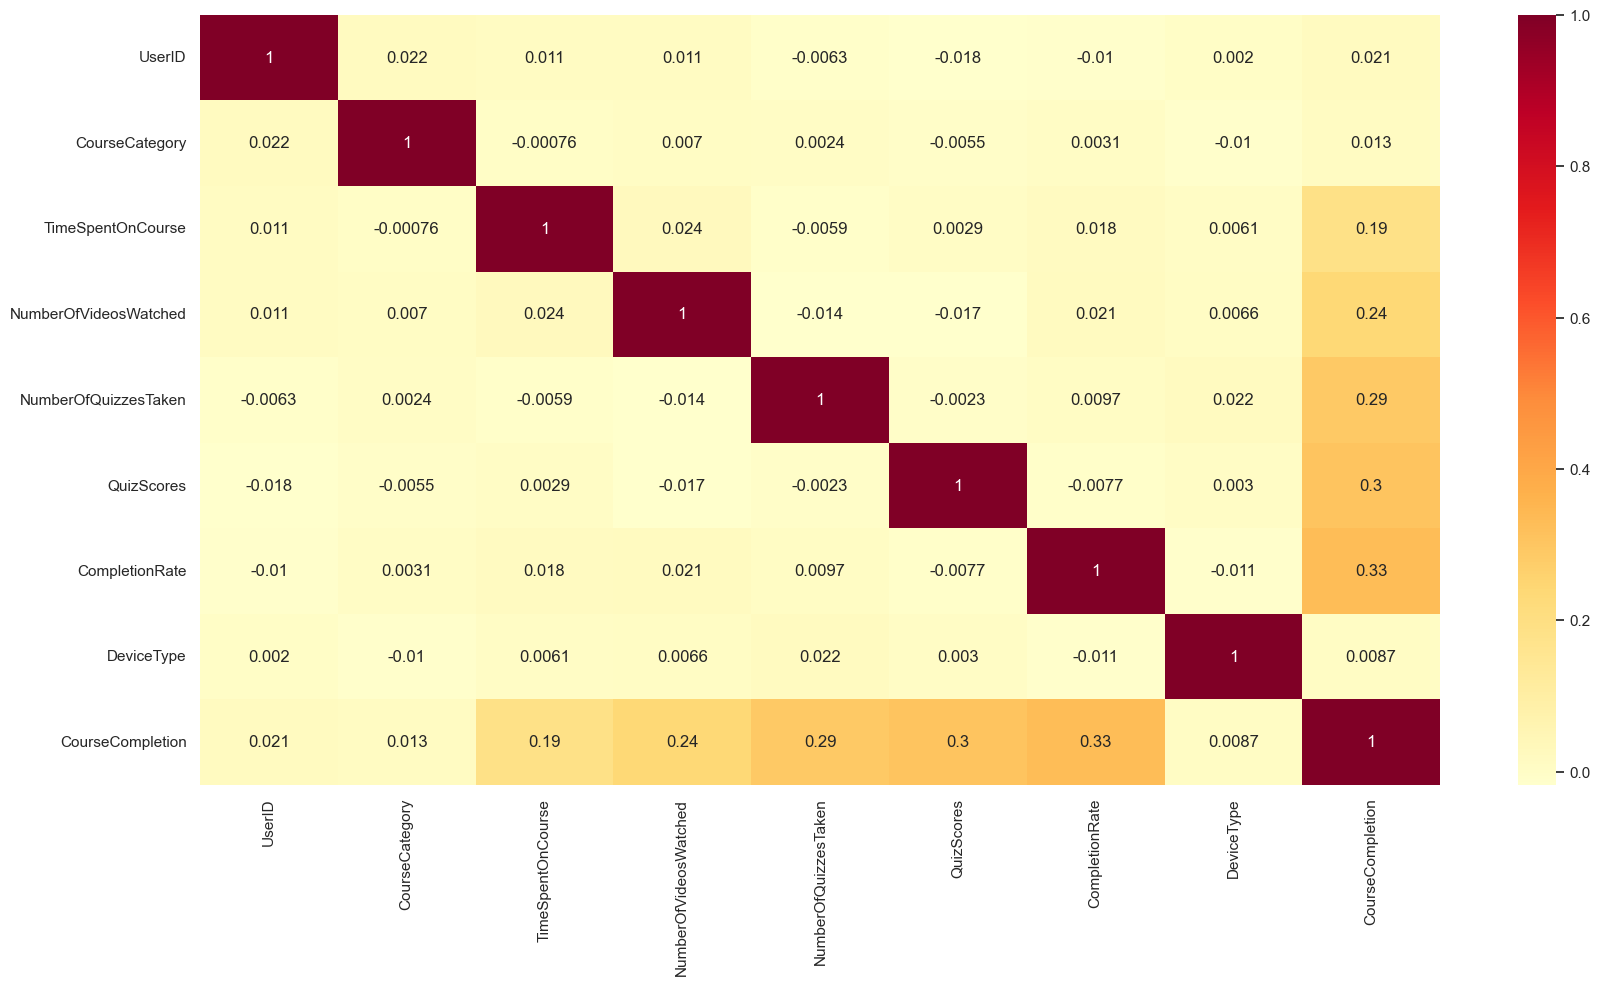

In [21]:
#visualizing the correlation
plt.figure(figsize=(20,10))
sns.heatmap(ds.corr(), annot=True, cmap="YlOrRd", linecolor='black')

In [22]:
#we define a correlation function that selects the highly correlated independent features
#and eliminates the first feature
def correlation(ds, threshold):
        correlated_cols = set() #initialized the set to store all the correlated columns
        correlation_matrix = ds.corr() #computing the correlation matrix
        for i in range(len(correlation_matrix.columns)):
            for j in range(i):
                if abs(correlation_matrix.iloc[i,j])> threshold:
                    column_name = correlation_matrix.columns[i] #getting the name of columns
                    correlated_cols.add(column_name)
        return correlated_cols 

In [23]:
#now we call the function "correlation"
corr_feature = correlation(ds.iloc[:,:-1],0.85) #correaled features are stored
print(f"Number of Correlated Features: {len(set(corr_feature))}")

Number of Correlated Features: 0


## Explanatory Data Analysis and Visualization

In [24]:
ds.head()

UserID  CourseCategory  TimeSpentOnCourse  NumberOfVideosWatched  \
0    5618               1          29.979719                     17   
1    4326               2          27.802640                      1   
2    5849               2          86.820485                     14   
3    4992               3          35.038427                     17   
4    3866               4          92.490647                     16   

   NumberOfQuizzesTaken  QuizScores  CompletionRate  DeviceType  \
0                     3   50.365656       20.860773           1   
1                     5   62.615970       65.632415           1   
2                     2   78.458962       63.812007           1   
3                    10   59.198853       95.433162           0   
4                     0   98.428285       18.102478           0   

   CourseCompletion  
0                 0  
1                 0  
2                 1  
3                 1  
4                 0

In [25]:
columns = ["TimeSpentOnCourse","NumberOfVideosWatched","NumberOfQuizzesTaken","QuizScores","CompletionRate"]

In [26]:
#define colors for the histograms
ds[columns].iplot(kind="histogram",subplots=True,title="Data Distribution of Columns", colors=['#FF0000', '#808080', '#0000FF',"#FFFF00","#00FFFF"])

In [27]:
#compare the ones completed the course with the not completed ones
for col in columns:
    fig = px.histogram(ds, col,             
                       color="CourseCompletion",histfunc="count",width=800,height=400)
    #update traces to add outline color                   
    fig.update_traces(marker=dict(line=dict(color='#000000', width=0.5)))
    fig.show()

In [28]:
#counts the number of users that completed a course or not
pd.DataFrame(ds['CourseCompletion'].value_counts()).rename({"CourseCompletion":"Counts"}, axis = 1).rename_axis("CourseCompletion")

count
CourseCompletion       
0                  4555
1                  3568

In [29]:
colors = ['yellow','red']
fig = px.pie(ds, names = "CourseCompletion",
            title = "<b>Course Completion Percentage</b>",
            hole = 0.4,
            width=600,
            height=400
)

fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))


fig.show()

## Courser Category Percentages

In [30]:
cat_counts = ds['CourseCategory'].value_counts()
print(f"\n Series Data Type \n \n {cat_counts} \n")
##this line of code counts the unique number of codes by using .value_counts()
cat_counts_df = ds['CourseCategory'].value_counts().reset_index()

print(f" \n DataFrame Data Type \n \n {cat_counts_df} \n ")
##.reset_index() changes the stucture from Series to DataFrame
cat_counts_df.columns = ['CourseCategory','Count'] #renames the columns


 Series Data Type 
 
 CourseCategory
5    1657
1    1634
4    1633
3    1629
2    1570
Name: count, dtype: int64 

 
 DataFrame Data Type 
 
    CourseCategory  count
0               5   1657
1               1   1634
2               4   1633
3               3   1629
4               2   1570 
 


In [31]:
#create a mapping of CourseCategory
category_mapping = {
    1: 'Health',
    2: 'Arts',
    3: 'Science',
    4: 'Programming',
    5: 'Business'
}
#convert 'CourseCategory' to a categorical type and sort
cat_counts_df['CourseCategory'] = cat_counts_df['CourseCategory'].astype(int)
cat_counts_df.sort_values('CourseCategory', inplace=True)
cat_counts_df['CourseCategory'] = cat_counts_df['CourseCategory'].astype(str)


custom_colors = ['red', 'green', 'yellow', 'cyan', 'magenta']
fig = px.bar(cat_counts_df, x='CourseCategory', y='Count', text='Count', title='CourseCategory Count Plot',
             color='CourseCategory', width=900, height=500, color_discrete_sequence=custom_colors)
fig.update_layout(
    xaxis_title='CourseCategory',
    yaxis_title='Count',
)

#annotations for the category descriptions
annotation_text = "<br>".join([f"{k}: {v}" for k, v in sorted(category_mapping.items())])
fig.add_annotation(
    text=annotation_text,
    xref="paper", yref="paper",
    x=1.1, y=0.25,
    showarrow=True,
    align='left',
    bgcolor='rgba(0,0,0,0.5)',
    font=dict(color='white')
)

fig.show()

In [32]:
fig = px.pie(ds, names = "CourseCompletion",
             title = "Counts in CourseCompletion",
             hole = 0.4, template = "plotly",
            width=600,
            height=400,
            )

fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  marker=dict(colors=colors, line=dict(color='#000000', width=1)))

annotation_text = "0: Not Completed<br>1: Completed"
fig.add_annotation(text=annotation_text,
                   xref="paper", yref="paper",
                   x=1.1, y=0.8,
                   showarrow=False,
                   font=dict(color='white'),
                   align='left',
                   bgcolor='rgba(0,0,0,0.5)')

fig.show()

In [33]:
colors = ['red', 'green', 'yellow', 'yellow', 'magenta']

# Convert 'CourseCategory' to a categorical type and sort
ds['CourseCategory'] = ds['CourseCategory'].astype(int)
ds.sort_values('CourseCategory', inplace=True)
ds['CourseCategory'] = ds['CourseCategory'].astype(str)

fig = px.pie(ds, names = "CourseCategory",
             title = "Counts in CourseCategory",
             hole = 0.4,
            width=600,
            height=400,
            )

fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  marker=dict(colors=colors, 
                              line=dict(color='#000000', width=2)))


annotation_text = "1: Health<br>2: Arts<br>3: Science<br>4: Programming<br>5: Business"
fig.add_annotation(text=annotation_text,
                   xref="paper", yref="paper",
                   x=1.1, y=0.15,
                   showarrow=False,
                   font=dict(color='black'),
                   align='left',
                   bgcolor='rgba(0,0,0,0.5)')

fig.show()

## Normalizing The Skewing Columns

In [34]:
#get the features and target columns
X=ds.iloc[:,0:-1]
y=ds.CourseCompletion

In [35]:
X.head()

UserID CourseCategory  TimeSpentOnCourse  NumberOfVideosWatched  \
0       5618              1          29.979719                     17   
3846    4954              1          27.666335                     10   
3849    2162              1          39.262879                      3   
3853    6401              1          53.148225                      7   
3858    3482              1          38.854095                     17   

      NumberOfQuizzesTaken  QuizScores  CompletionRate  DeviceType  
0                        3   50.365656       20.860773           1  
3846                     9   69.961393       80.174725           1  
3849                     4   55.283331       92.815730           1  
3853                     5   59.777399        3.993339           0  
3858                     6   80.768108       49.180268           1

##### transforming data columns that have a skewed distribution into a more normal (Gaussian) distribution. This is often done to improve the performance of machine learning models, as many algorithms assume that the data follows a normal distribution.

In [36]:
#calculate skewness
skewness = ds.skew()

#identify highly skewed columns
skewed_columns = skewness[skewness.abs() > 1].index

print("Skewness of columns:")
print(skewness)
print("\n Highly skewed columns:")
print(skewed_columns)

if len(skewed_columns) > 0:
    print("\nThere are skewed columns.")
else:
    print("\nThere are NO skewed columns.")

methods = ["Log Transformation","Square Root Transformation","Box-Cox Transformation","Power Transformation"]

print("\nIf there are skewed columns, we can apply the following methods:")
for method in methods:
    print(f" \u2022{method}")

Skewness of columns:
UserID                   0.000379
CourseCategory          -0.017732
TimeSpentOnCourse        0.005895
NumberOfVideosWatched   -0.028106
NumberOfQuizzesTaken     -0.05985
QuizScores              -0.014657
CompletionRate          -0.046049
DeviceType              -0.001724
CourseCompletion         0.244873
dtype: object

 Highly skewed columns:
Index([], dtype='object')

There are NO skewed columns.

If there are skewed columns, we can apply the following methods:
 •Log Transformation
 •Square Root Transformation
 •Box-Cox Transformation
 •Power Transformation


## Q-Q Plots That Show That The Columns are NOT Skewed

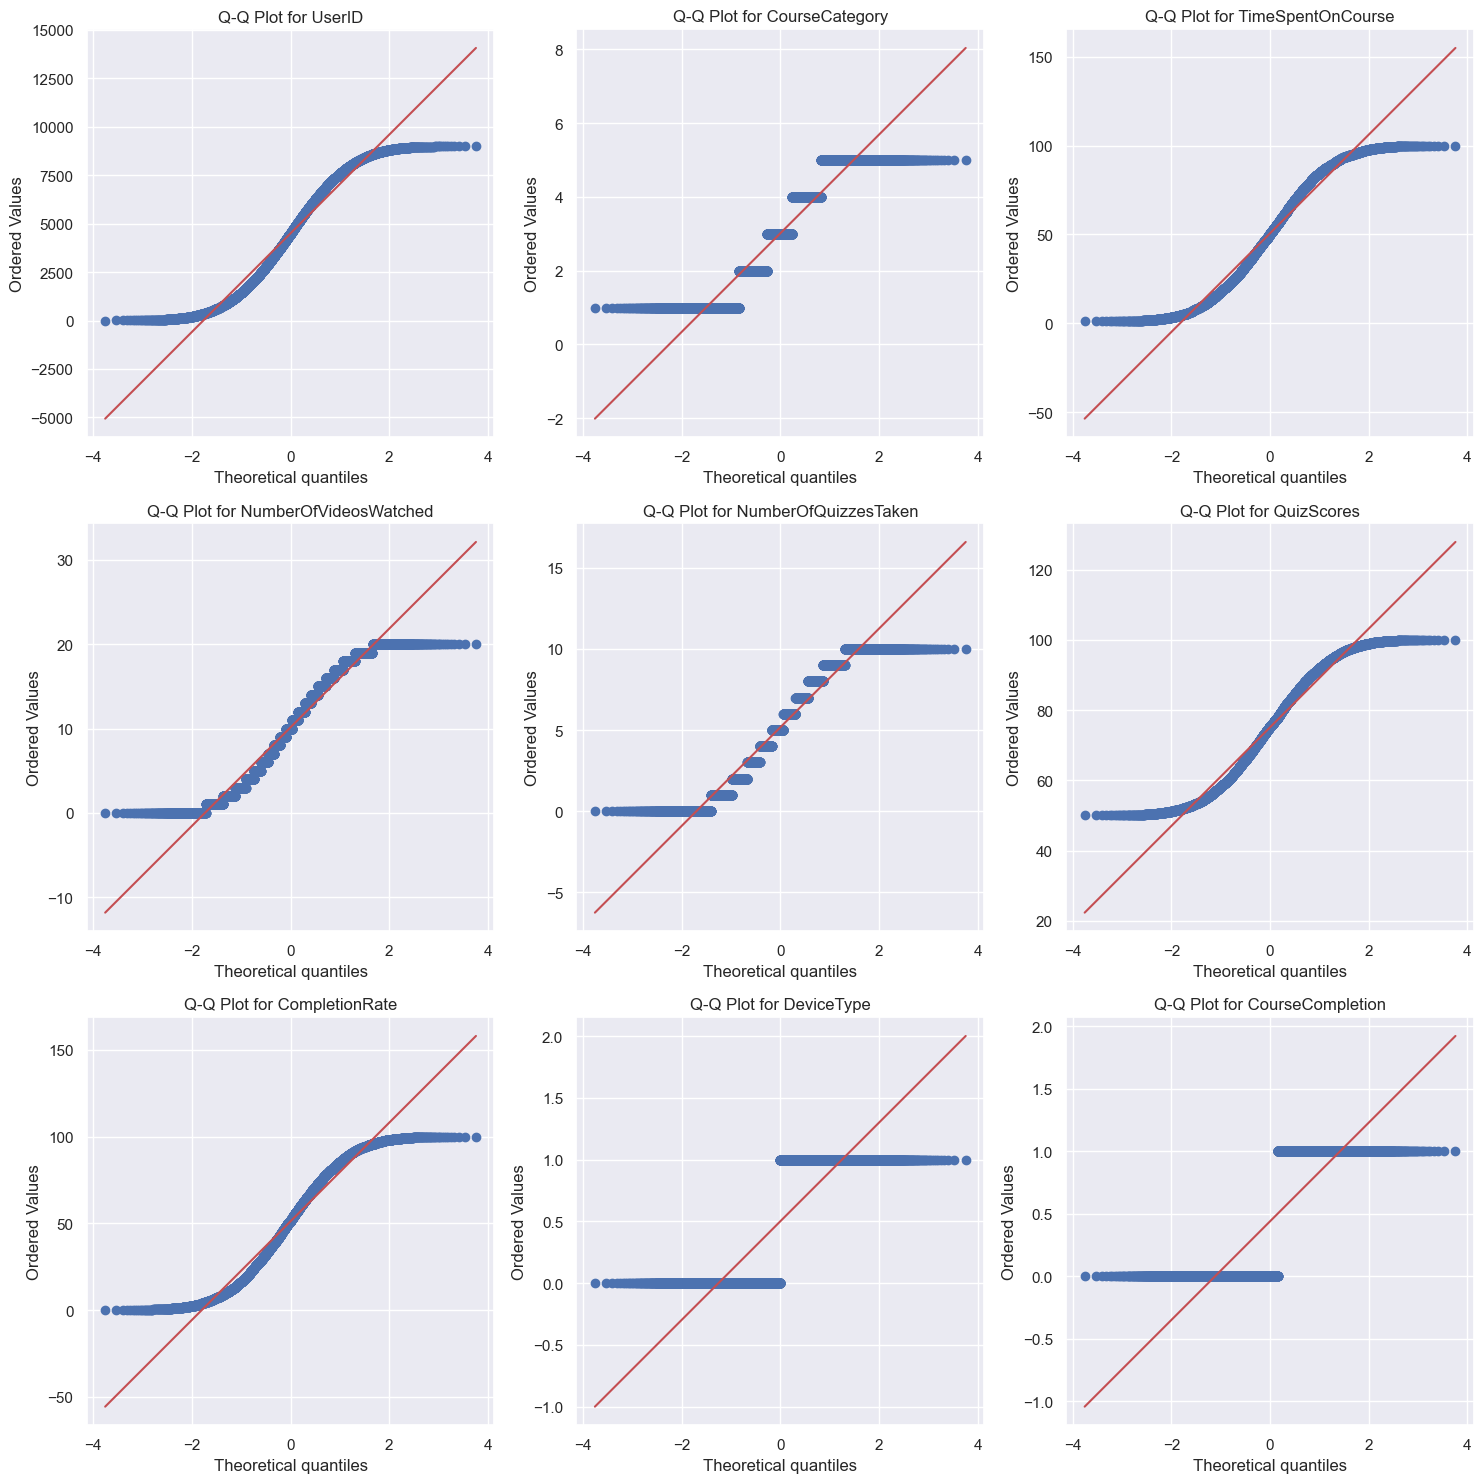

In [37]:
#ensure all columns are numeric and handle missing values
ds = ds.apply(pd.to_numeric, errors='coerce').dropna()

#create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

#flatten the axes array for easy iteration
axes = axes.flatten()

#generate Q-Q plots for each column
for i, column in enumerate(ds.columns):
    stats.probplot(ds[column], dist="norm", plot=axes[i])
    axes[i].set_title(f'Q-Q Plot for {column}')

plt.tight_layout()
plt.show()

## Defining Outliers in The Columns if There are Any

In [38]:
def detect_outliers(ds):
    #Z-score method: Calculates the Z-scores and detects outliers where the absolute Z-score is greater than 3.
    z_scores = stats.zscore(ds.select_dtypes(include=[np.number]))
    abs_z_scores = np.abs(z_scores)
    z_outliers = (abs_z_scores > 3).any(axis=1)
    
    #IQR method: Calculates the Interquartile Range (IQR) and detects outliers using the IQR criteria.
    Q1 = ds.quantile(0.25)
    Q3 = ds.quantile(0.75)
    IQR = Q3 - Q1
    iqr_outliers = ((ds < (Q1 - 1.5 * IQR)) | (ds > (Q3 + 1.5 * IQR))).any(axis=1)
    
    #Combine both methods
    outliers = z_outliers | iqr_outliers

    return ds[outliers], outliers

#detecting outliers
outliers_ds, outliers_mask = detect_outliers(ds)

if outliers_ds.empty:
    print("There are NO outliers.")
else:
    print("Outliers detected:")
    print(outliers_ds)
    
    #removing outliers
    ds_without_outliers = ds[~outliers_mask]

    #print the resulting DataFrame without outliers
    print("DataFrame without outliers:")
    print(ds_without_outliers)

There are NO outliers.


# MODEL TRAINING

## Train, Test Split

##### test_size=0.2: Using 20% of data for testing is a common practice. It provides a sufficient amount of data to evaluate the model's performance while leaving enough data for training. 

##### random_state=42:  Setting random_state ensures that the data is split in the same way each time you run the code. This makes results reproducible.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
   
#print the shapes of the resulting splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (6498, 8)
X_test shape: (1625, 8)
y_train shape: (6498,)
y_test shape: (1625,)


## Data Preprocessing

### Scaling The Features

##### This step ensures that features are on a similar scale, which can improve the performance of many machine learning algorithms.

In [40]:
from sklearn.pipeline import Pipeline
#StandardScaler
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

#applying scaling only to the numerical features
X_train_scaled[columns] = scaler.fit_transform(X_train[columns])
X_test_scaled[columns] = scaler.transform(X_test[columns])

print("Scaled Training Features:")
print(X_train_scaled.head())

print("\n\nScaled Testing Features:")
print(X_test_scaled.head())

#defining the model
model = LogisticRegression()

#creating a pipeline with StandardScaler
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', model)
])

#evaluate the model using cross-validation
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
print(f'\nStandardScaler Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})')

Scaled Training Features:
      UserID CourseCategory  TimeSpentOnCourse  NumberOfVideosWatched  \
1350    6201              3           0.416438               0.469804   
7869    4353              5           0.897932               0.636050   
4340    2488              4           0.209604              -0.527675   
2075    7154              5          -0.314432              -0.361429   
1613    3718              1           1.245219               1.467282   

      NumberOfQuizzesTaken  QuizScores  CompletionRate  DeviceType  
1350             -0.375169    1.703711        1.330303           1  
7869              1.220283    0.985365        0.609693           1  
4340              1.539373   -1.359497        1.616973           0  
2075             -0.375169    0.311072        1.121095           1  
1613             -1.013350   -1.639737       -0.044545           0  


Scaled Testing Features:
      UserID CourseCategory  TimeSpentOnCourse  NumberOfVideosWatched  \
2750    2169         

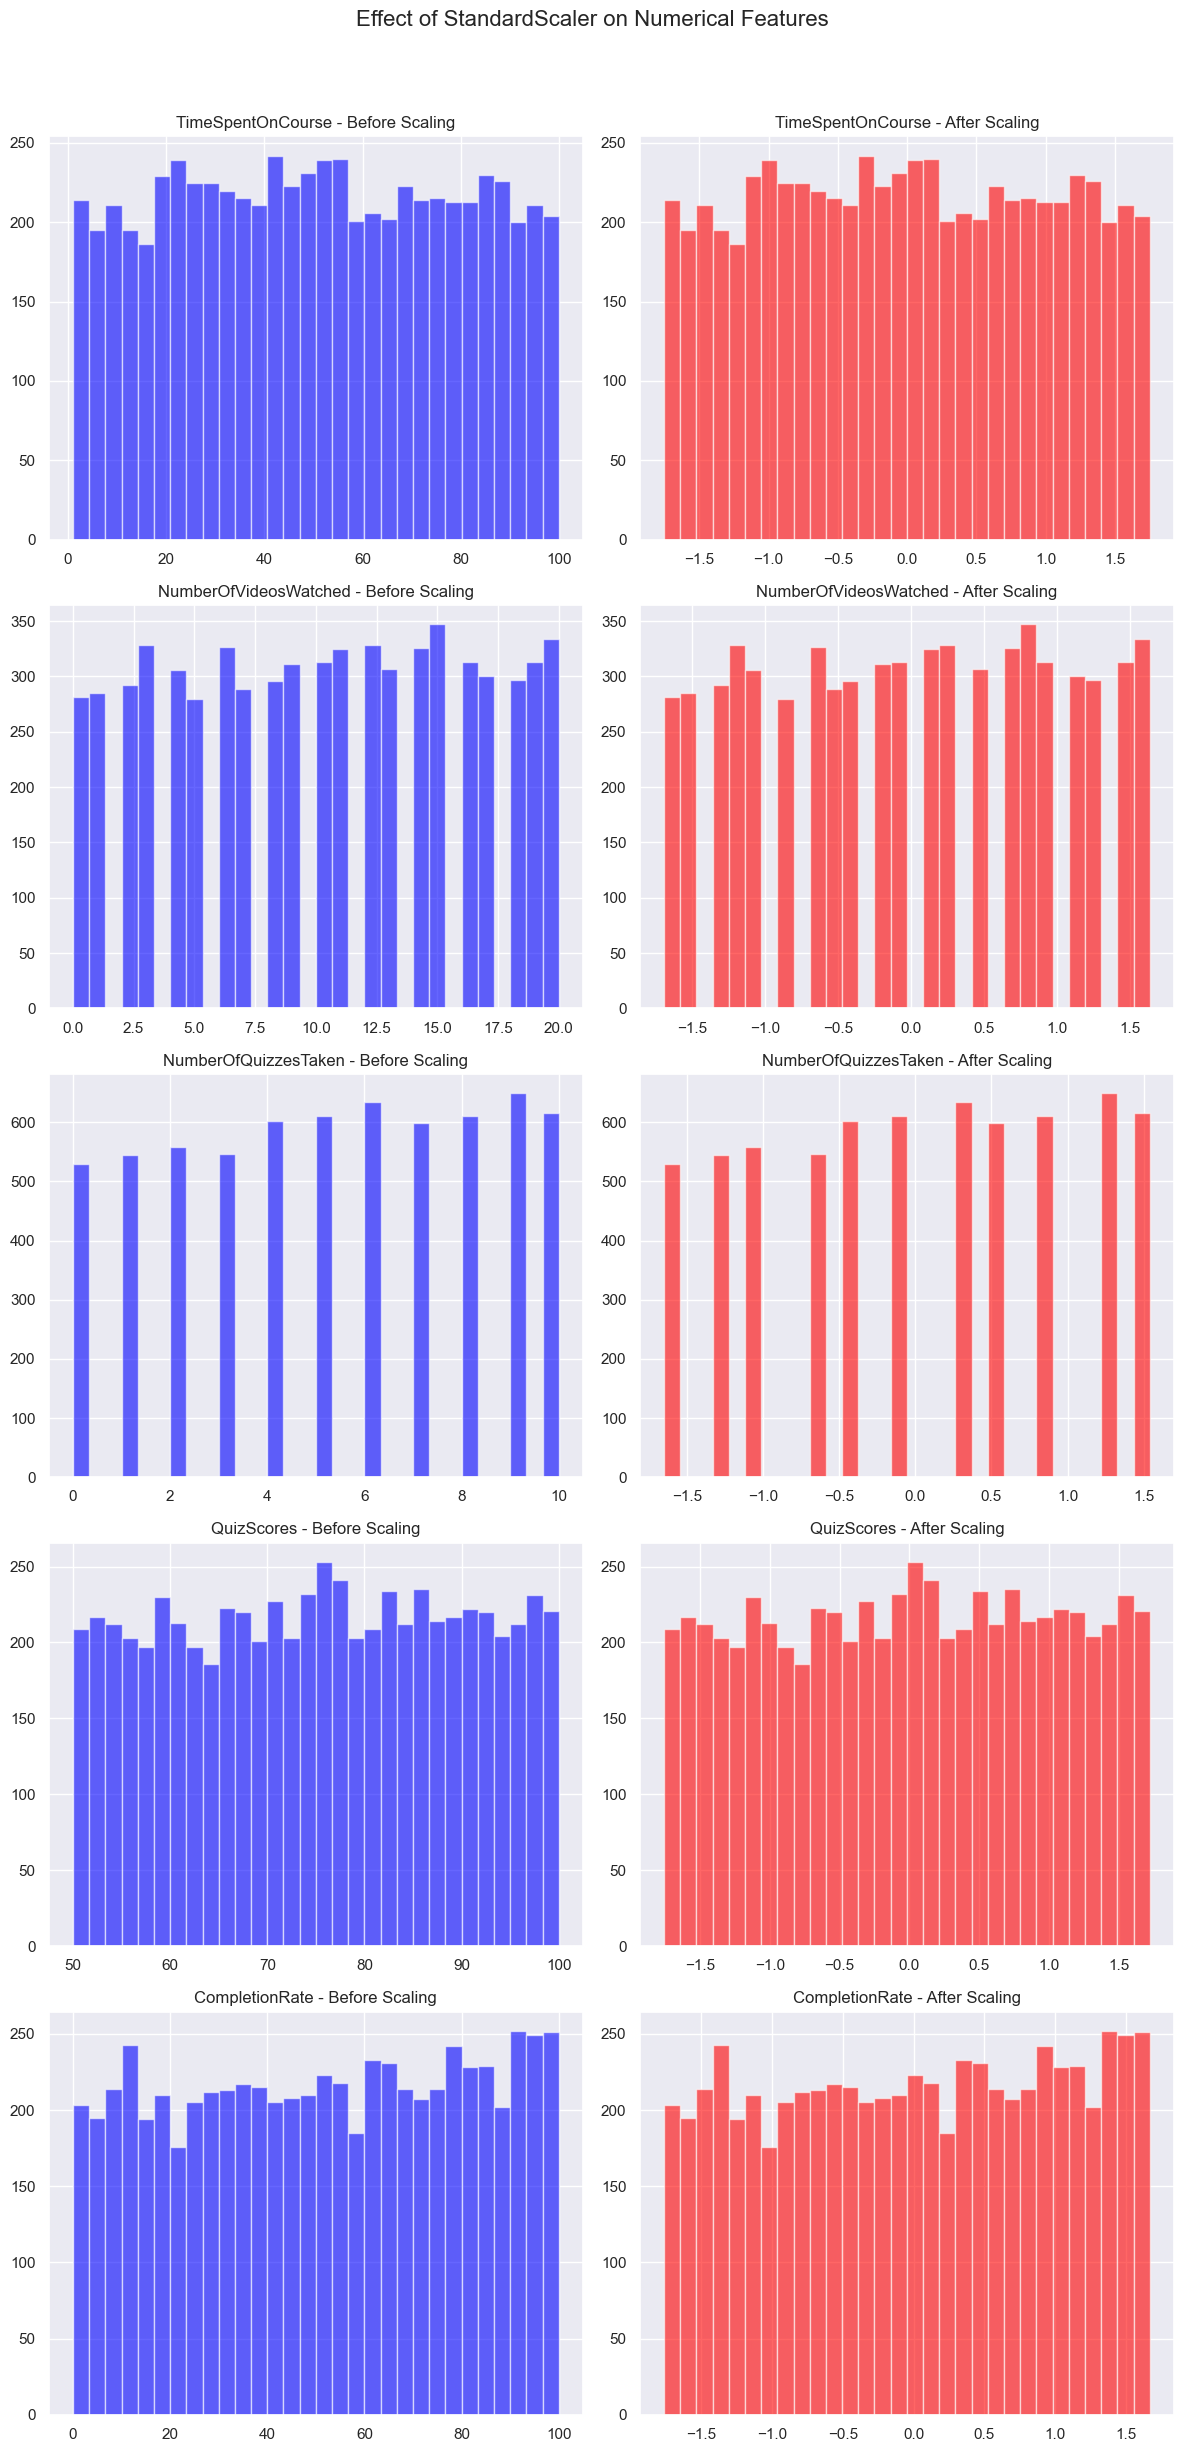

In [41]:
#plot histograms before and after scaling
fig, axes = plt.subplots(len(columns), 2, figsize=(12, len(columns) * 5))
fig.suptitle('Effect of StandardScaler on Numerical Features', fontsize=16)

for i, feature in enumerate(columns):
    #original data
    axes[i, 0].hist(X_train[feature], bins=30, alpha=0.6, color='blue')
    axes[i, 0].set_title(f'{feature} - Before Scaling')
    
    #scaled data
    axes[i, 1].hist(X_train_scaled[feature], bins=30, alpha=0.6, color='red')
    axes[i, 1].set_title(f'{feature} - After Scaling')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Defining and Selecting Models

In [42]:
#define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier(),
    'Neural Network': MLPClassifier(max_iter=1000)
}

In [43]:
#evaluate models using cross-validation
for model_name, model in models.items():
    pipeline = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    scores = cross_val_score(pipeline, X_train_scaled, y_train, cv=5, scoring='accuracy')
    print(f'{model_name} Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})')

Logistic Regression Accuracy: 0.7958 (+/- 0.0088)
Decision Tree Accuracy: 0.9605 (+/- 0.0044)
Random Forest Accuracy: 0.9583 (+/- 0.0018)
SVM Accuracy: 0.8687 (+/- 0.0092)
Gradient Boosting Accuracy: 0.9575 (+/- 0.0025)
KNN Accuracy: 0.8421 (+/- 0.0101)
Neural Network Accuracy: 0.9007 (+/- 0.0054)


##### Given that Random Forest has a highh accuracy, we can choose Random Forest as our model.

In [44]:
#define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

#create a pipeline
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', rf_model)
])

#train the model
pipeline.fit(X_train_scaled, y_train)

#make predictions
y_pred = pipeline.predict(X_test_scaled)
y_pred_proba = pipeline.predict_proba(X_test_scaled)[:, 1]

#evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

#print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Test Accuracy: 0.9649
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       935
           1       0.96      0.96      0.96       690

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



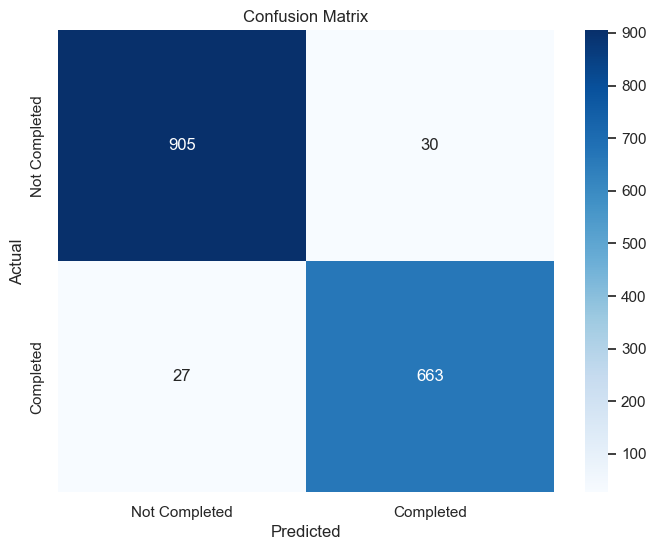

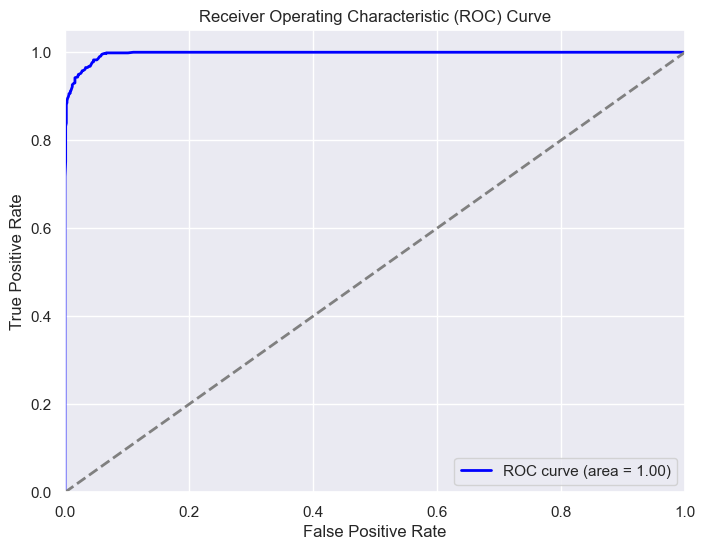

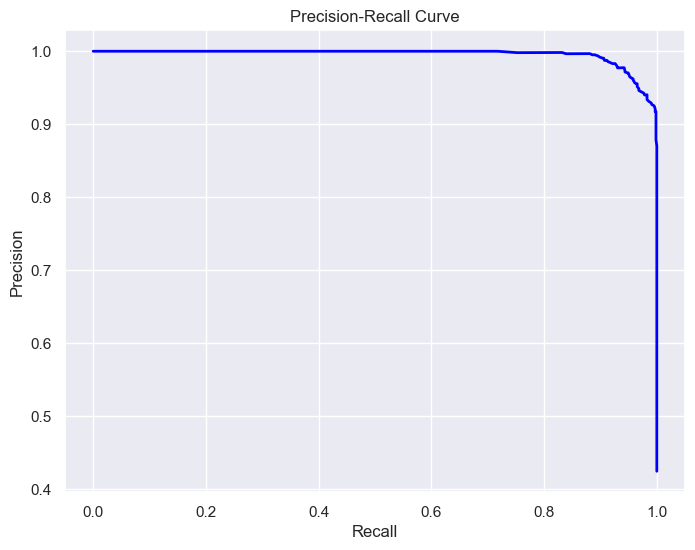

In [45]:
#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Completed', 'Completed'], yticklabels=['Not Completed', 'Completed'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

#Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [46]:
#function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, title):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Completed', 'Completed'], yticklabels=['Not Completed', 'Completed'])
    plt.title(f'{title} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

#function to plot ROC curve
def plot_roc_curve(y_test, y_pred_proba, title):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title(f'{title} - Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

#function to plot Precision-Recall curve
def plot_precision_recall_curve(y_test, y_pred_proba, title):
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2)
    plt.title(f'{title} - Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       935
           1       0.75      0.71      0.73       690

    accuracy                           0.77      1625
   macro avg       0.77      0.77      0.77      1625
weighted avg       0.77      0.77      0.77      1625



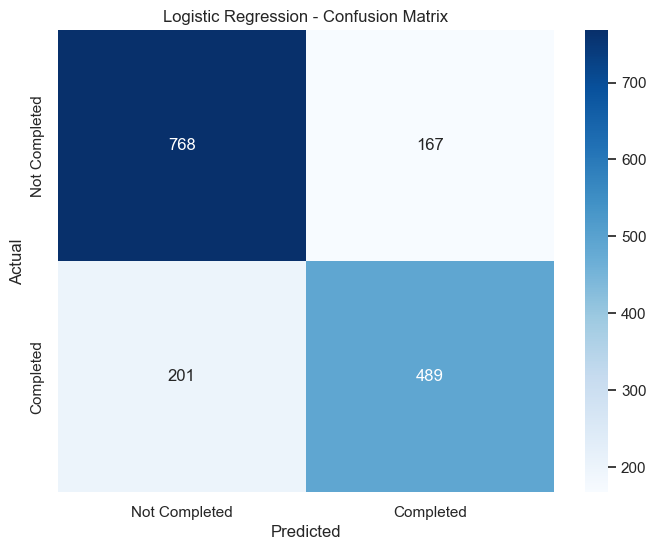

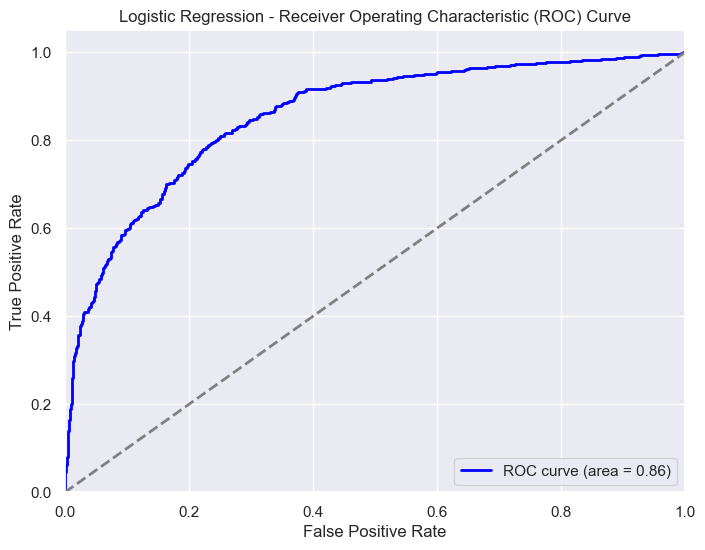

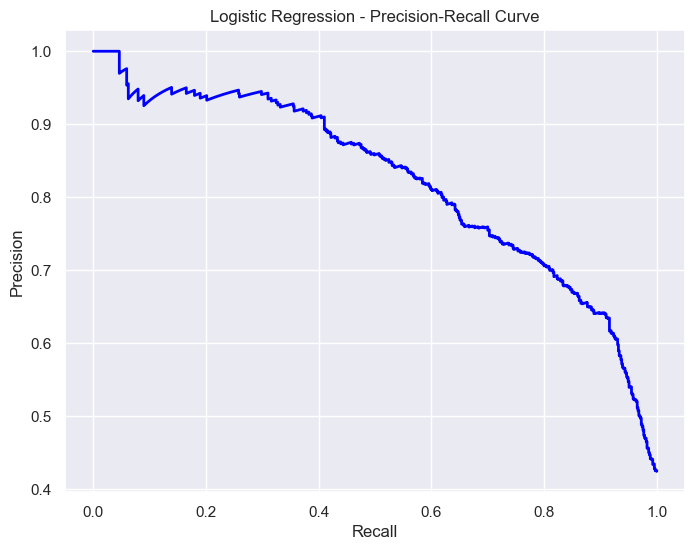

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       935
           1       0.96      0.96      0.96       690

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



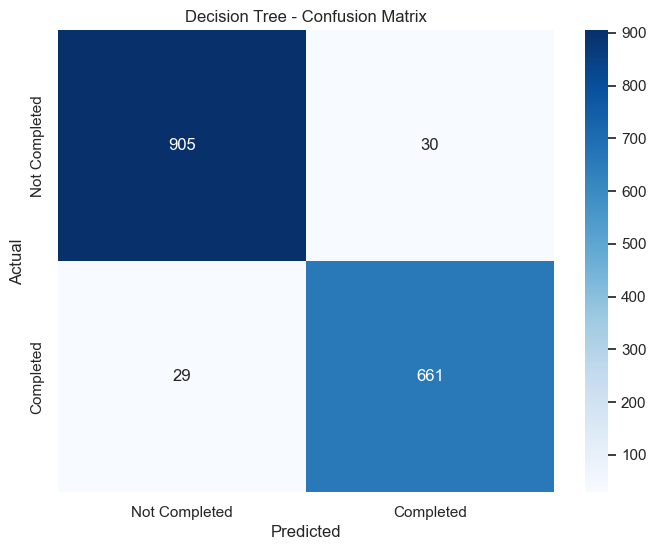

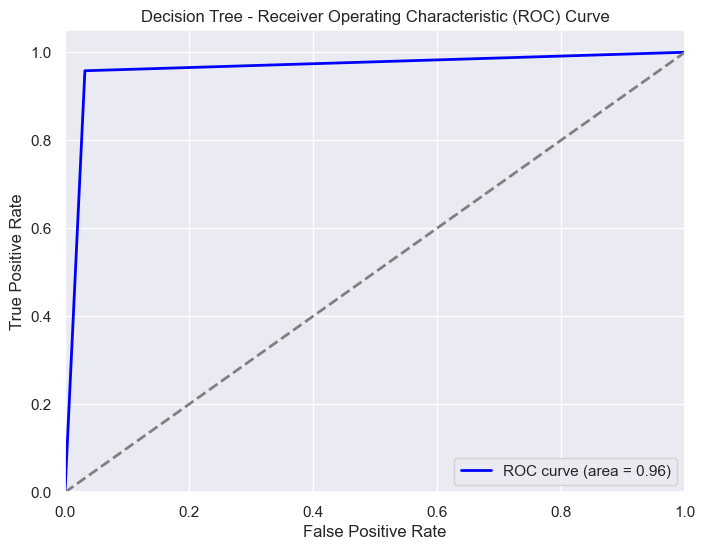

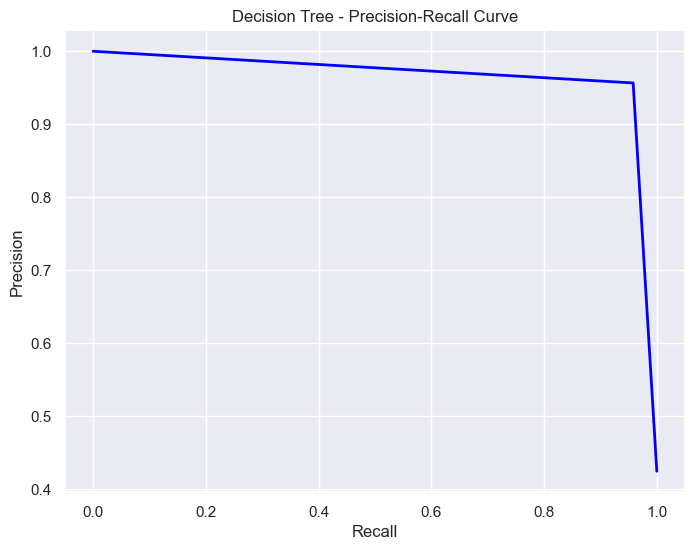

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       935
           1       0.97      0.96      0.96       690

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625



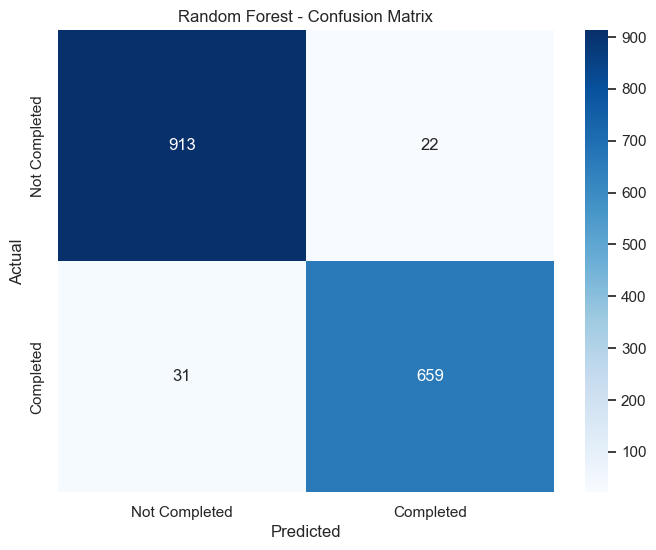

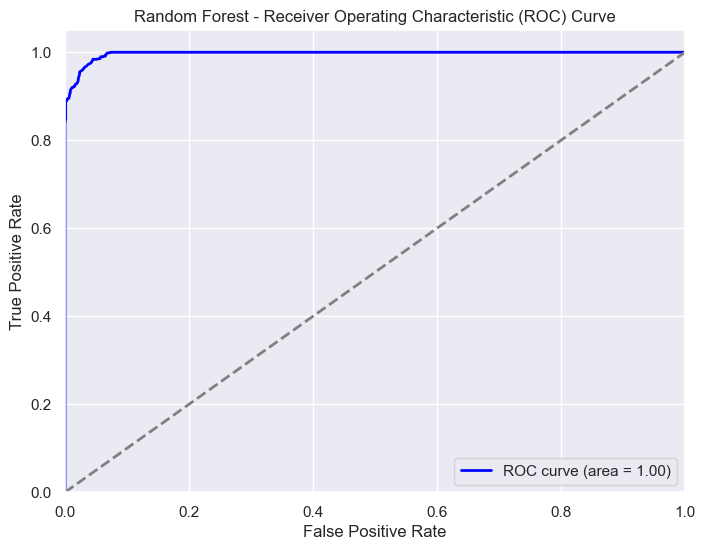

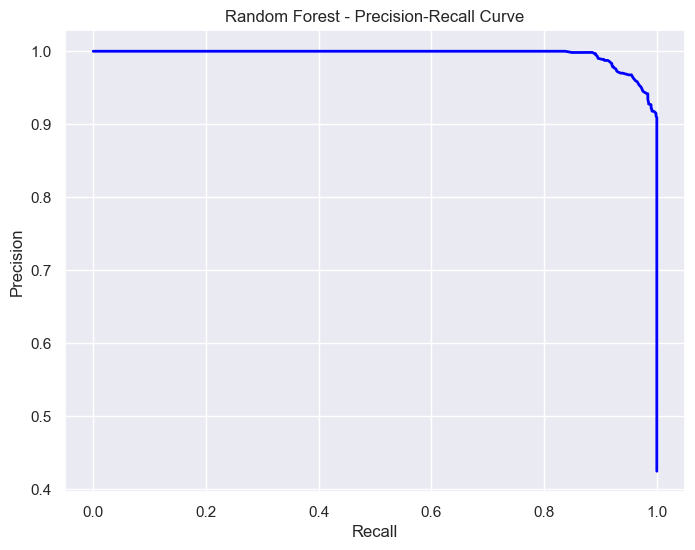

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       935
           1       0.84      0.80      0.82       690

    accuracy                           0.85      1625
   macro avg       0.85      0.84      0.84      1625
weighted avg       0.85      0.85      0.85      1625



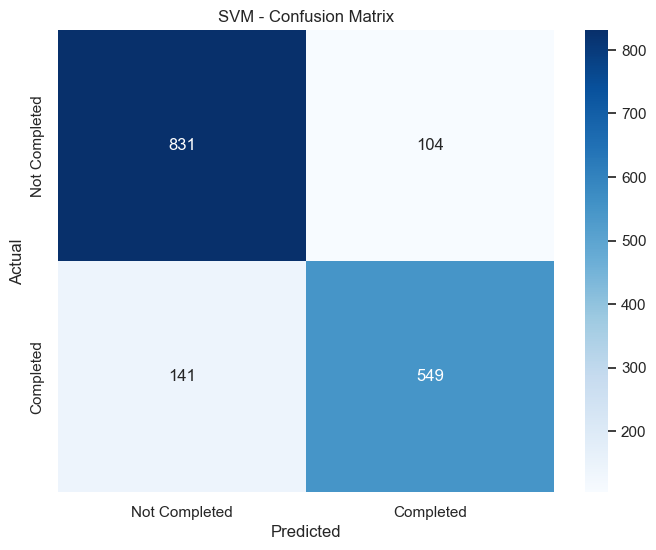

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       935
           1       0.96      0.96      0.96       690

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



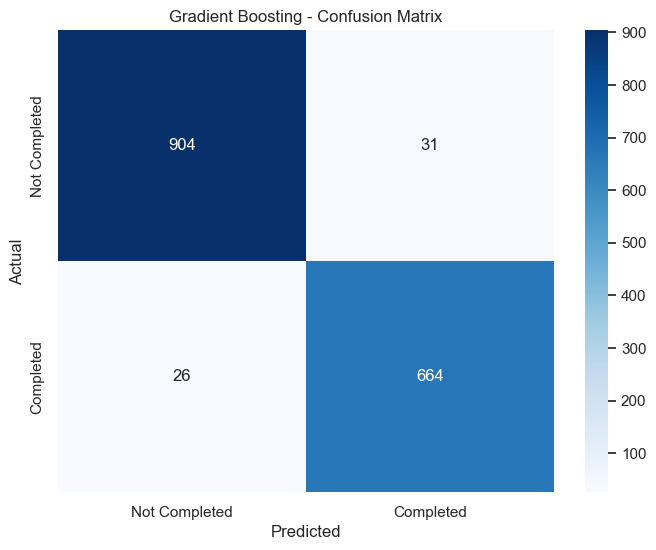

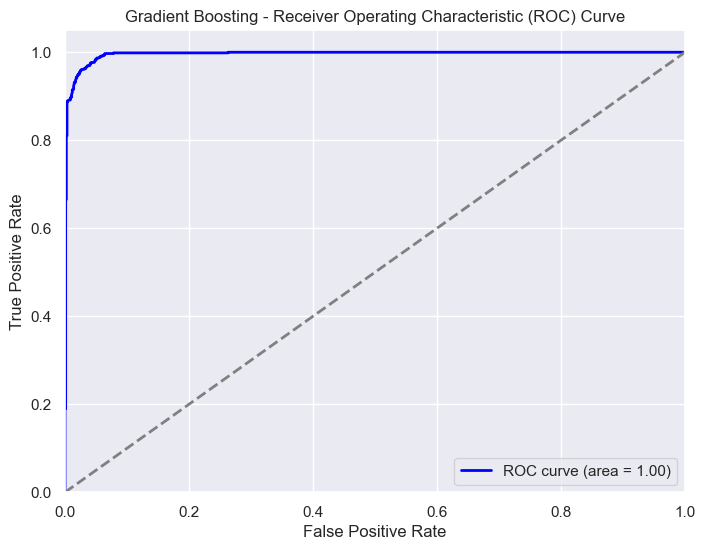

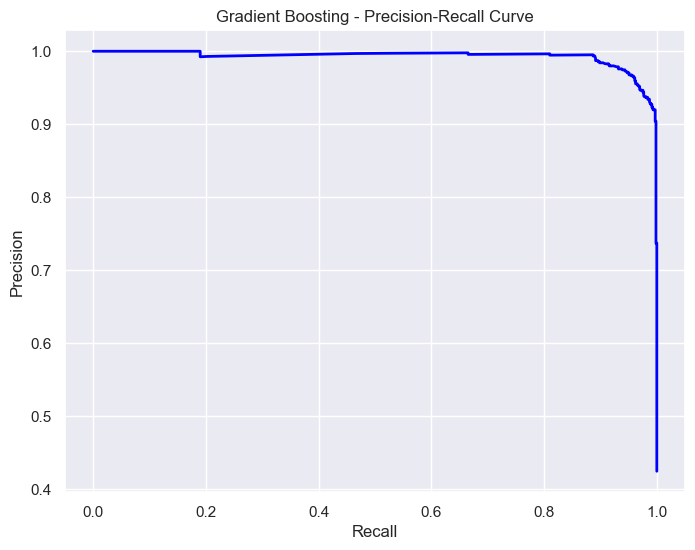

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       935
           1       0.83      0.85      0.84       690

    accuracy                           0.86      1625
   macro avg       0.86      0.86      0.86      1625
weighted avg       0.86      0.86      0.86      1625



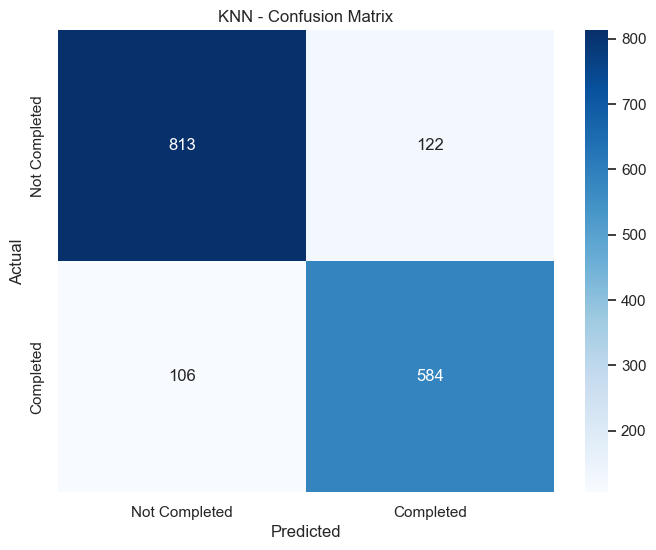

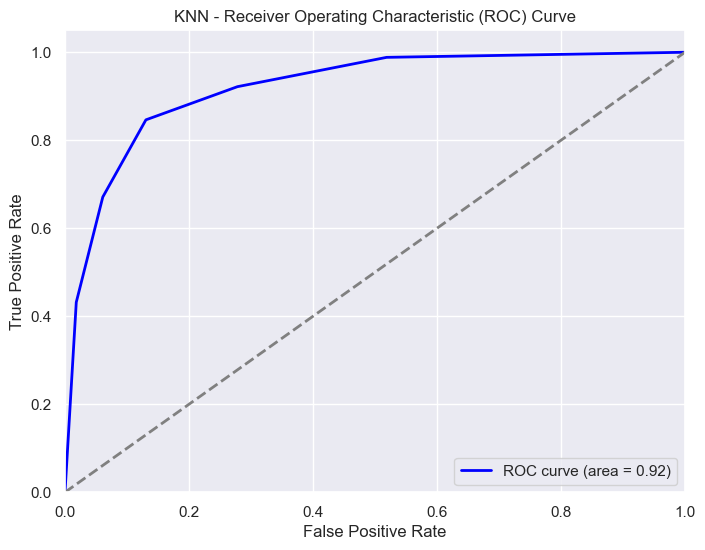

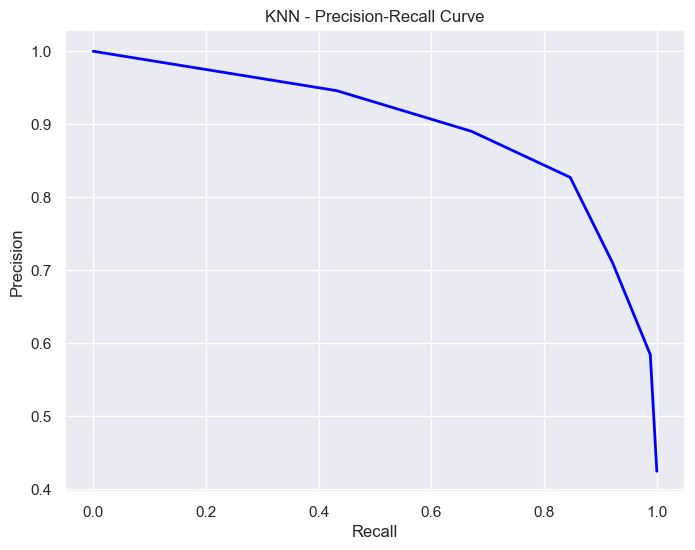

Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       935
           1       0.89      0.89      0.89       690

    accuracy                           0.91      1625
   macro avg       0.90      0.90      0.90      1625
weighted avg       0.91      0.91      0.91      1625



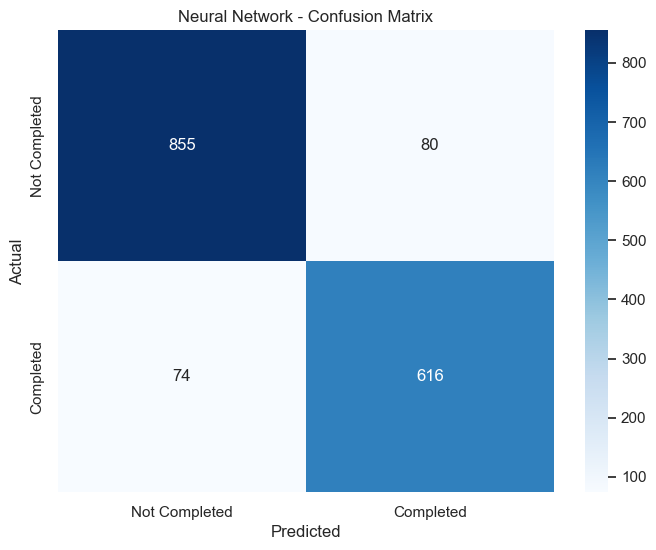

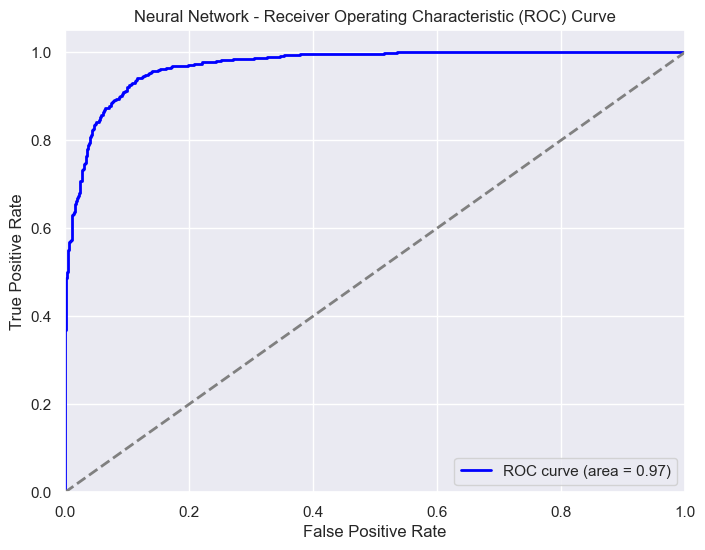

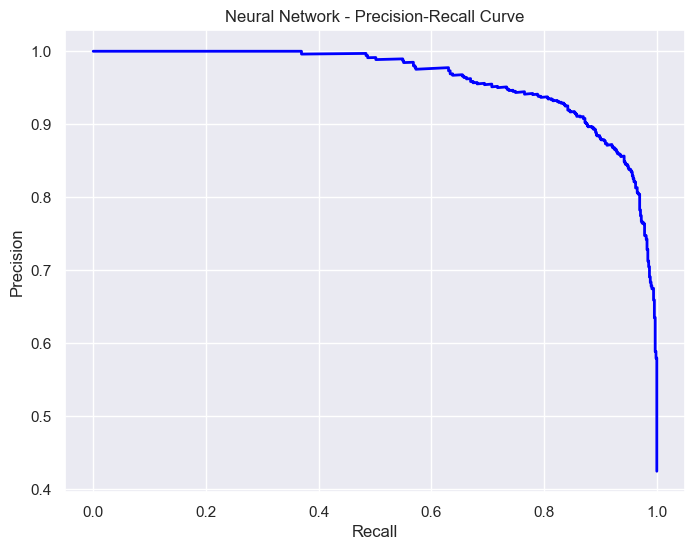

In [47]:
#initialize a list to store the results
results = []

#train, predict, and visualize for each model
for model_name, model in models.items():
    pipeline = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    
    #train the model
    pipeline.fit(X_train_scaled, y_train)
    
    #make predictions
    y_pred = pipeline.predict(X_test_scaled)
    y_train_pred = pipeline.predict(X_train_scaled)
    
    #calculate probabilities for ROC and Precision-Recall curves if supported
    if hasattr(model, "predict_proba"):
        y_pred_proba = pipeline.predict_proba(X_test_scaled)[:, 1]
    else:
        y_pred_proba = None
    
    #evaluate the model
    test_accuracy = accuracy_score(y_test, y_pred)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    #append results
    results.append({
        'Model': model_name,
        'Test Accuracy': test_accuracy,
        'Train Accuracy': train_accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })
    
    #print classification report
    print(f'{model_name} Classification Report:')
    print(classification_report(y_test, y_pred))
    
    #plot confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Completed', 'Completed'], yticklabels=['Not Completed', 'Completed'])
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    #plot ROC curve and Precision-Recall curve if model supports predict_proba
    if y_pred_proba is not None:
        
        #ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.title(f'{model_name} - Receiver Operating Characteristic (ROC) Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.show()
        
        #Precision-Recall Curve
        precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_proba)
        plt.figure(figsize=(8, 6))
        plt.plot(recall_curve, precision_curve, color='blue', lw=2)
        plt.title(f'{model_name} - Precision-Recall Curve')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.show()


In [48]:
#convert results to a DataFrame
results_df = pd.DataFrame(results)

#display the results
print("Model Performance:")
print(results_df)

#create an interactive table using Plotly
fig = go.Figure(data=[go.Table(
    header=dict(values=list(results_df.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[results_df[col] for col in results_df.columns],
               fill_color='lavender',
               align='left'))
])

fig.update_layout(title='Model Performance Comparison')
fig.show()

Model Performance:
                 Model  Test Accuracy  Train Accuracy  Precision    Recall  \
0  Logistic Regression       0.773538        0.796861   0.745427  0.708696   
1        Decision Tree       0.963692        1.000000   0.956585  0.957971   
2        Random Forest       0.967385        1.000000   0.967695  0.955072   
3                  SVM       0.849231        0.884580   0.840735  0.795652   
4    Gradient Boosting       0.964923        0.971222   0.955396  0.962319   
5                  KNN       0.859692        0.904432   0.827195  0.846377   
6       Neural Network       0.905231        0.957064   0.885057  0.892754   

   F1 Score  
0  0.726597  
1  0.957277  
2  0.961342  
3  0.817573  
4  0.958845  
5  0.836676  
6  0.888889  


# Visualizing The Performance of The Models

In [49]:
fig_model_perf =px.bar(data_frame=results_df,
                x= "Model",
                y="Train Accuracy",
                color="Model",
                text="Train Accuracy",
                title="<b>Models Train Accuracy</b>", 
                template='plotly')

fig_model_perf.update_layout(bargap=0.3)
fig_model_perf.update_traces(texttemplate='%{text:.4f}', textposition='outside') 

fig_model_perf.show()

In [50]:
fig_model_perf =px.bar(data_frame=results_df,
                x= "Model",
                y="Test Accuracy",
                color="Model",
                text="Test Accuracy",
                title="<b>Models Test Accuracy</b>", 
                template='plotly')

fig_model_perf.update_layout(bargap=0.3)
fig_model_perf.update_traces(texttemplate='%{text:.4f}', textposition='outside') 

fig_model_perf.show()

In [51]:
fig_model_perf =px.bar(data_frame=results_df,
                x= "Model",
                y="Precision",
                color="Model",
                text="Precision",
                title="<b>Models Precision</b>", 
                template='plotly')

fig_model_perf.update_layout(bargap=0.3)
fig_model_perf.update_traces(texttemplate='%{text:.4f}', textposition='outside') 

fig_model_perf.show()

In [52]:
fig_model_perf =px.bar(data_frame=results_df,
                x= "Model",
                y="Recall",
                color="Model",
                text="Recall",
                title="<b>Models Recall</b>", 
                template='plotly')

fig_model_perf.update_layout(bargap=0.3)
fig_model_perf.update_traces(texttemplate='%{text:.4f}', textposition='outside') 

fig_model_perf.show()

In [53]:
fig_model_perf =px.bar(data_frame=results_df,
                x= "Model",
                y="F1 Score",
                color="Model",
                text="F1 Score",
                title="<b>Models F1 Score</b>", 
                template='plotly')

fig_model_perf.update_layout(bargap=0.3)
fig_model_perf.update_traces(texttemplate='%{text:.4f}', textposition='outside') 

fig_model_perf.show()